In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#Uncomment the folder where the data is stored
folder = "sequential/"
#folder = "parallel/"

In [32]:
start = pd.read_csv(folder + "start.csv", sep=";")
mid = pd.read_csv(folder + "mid.csv", sep=";")
end = pd.read_csv(folder + "end.csv", sep=";")
types = {
    0: "B",
    1: "T",
    2: "Ag",
    3: "Ab"
}

In [33]:
start["Type"] = start["Type"].map(types)
mid["Type"] = mid["Type"].map(types)
end["Type"] = end["Type"].map(types)

In [34]:
'''
l = ["B"]
start = start[start["Type"].isin(l)]
mid = mid[mid["Type"].isin(l)]
end = end[end["Type"].isin(l)]
'''


'\nl = ["B"]\nstart = start[start["Type"].isin(l)]\nmid = mid[mid["Type"].isin(l)]\nend = end[end["Type"].isin(l)]\n'

In [35]:
(
    pd.DataFrame({
        "start": start["Type"].value_counts(),
        "mid": mid["Type"].value_counts(),
        "end": end["Type"].value_counts()
    })
    .fillna(0)
    .transpose()
    .astype(int)
)

,Ab,Ag,B,T
start,0,1955,213,187
mid,2492,809,836,187
end,4808,536,1415,187


In [36]:
colors = {
    "B": "blue",
    "T": "purple",
    "Ag": "red",
    "Ab": "green"
}

In [37]:
def scatter_cells(data, colors):
    grouped_data = data.groupby("Type")
    plots = {t: plt.scatter(group["Pos_x"], group["Pos_y"], s=2, alpha=0.7, c=colors[t]) for t, group in grouped_data}
    plt.legend(plots.values(), plots.keys(), ncol=len(plots))

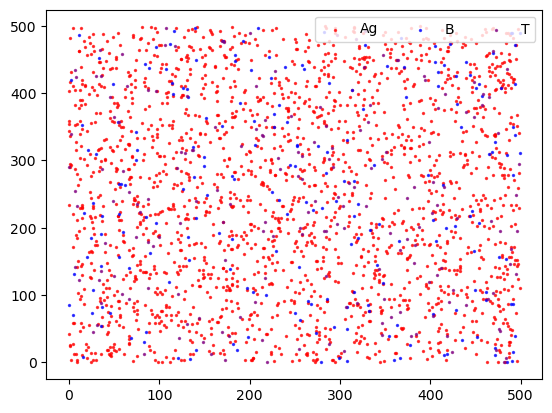

In [38]:
scatter_cells(start, colors)
#plt.savefig(folder + "images/start_150_100_1800.png")

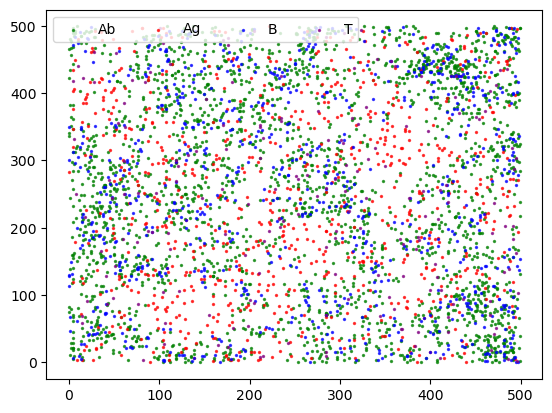

In [39]:
scatter_cells(mid, colors)
#plt.savefig(folder + "images/mid_150_100_1800.png")

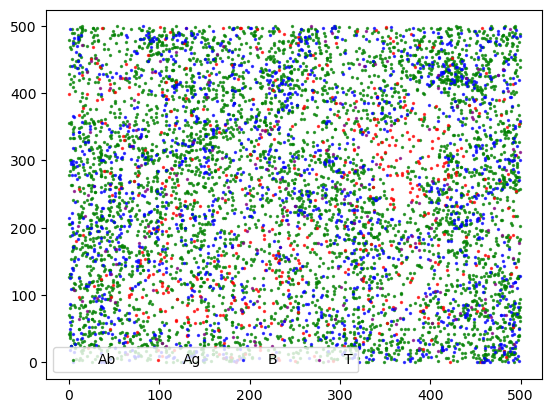

In [40]:
scatter_cells(end, colors)
#plt.savefig(folder + "images/end_150_100_1800.png")

<AxesSubplot:ylabel='Frequency'>

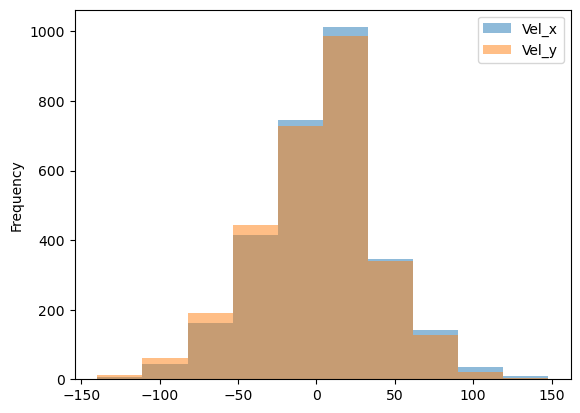

In [39]:
mid[["Vel_x", "Vel_y"]].plot(kind="hist", alpha=0.5, bins=10)